In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt

In [2]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
#alternatively
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Assign the Measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [10]:
# Assign the Station class to a variable called `Station`
Station = Base.classes.station

In [11]:
# Create a session
session = Session(engine)

In [12]:
###Precipitation Analysis
year_ago = dt.date.today() - dt.timedelta(days=365)
print(year_ago)

2017-05-09


In [64]:
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

In [14]:
precipitation_df =pd.DataFrame(results, columns = ['date','prcp'])
precipitation_df.set_index('date', inplace = True)
precipitation_df.head()

,prcp
date,
2017-05-09,1.62
2017-05-09,0.52
2017-05-09,0.68
2017-05-09,1.58
2017-05-09,0.23


Text(0,0.5,'Precipitation')

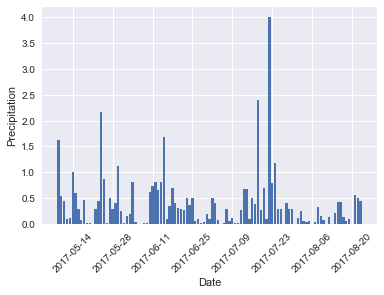

In [15]:
plt.bar(precipitation_df.index, precipitation_df['prcp'])
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [16]:
summary = precipitation_df.describe()
print(summary)

             prcp
count  550.000000
mean     0.127545
std      0.301223
min      0.000000
25%      0.000000
50%      0.020000
75%      0.120000
max      4.000000


In [17]:
###Station Analysis
#query for total number of stations
num_station = session.query(Station.station).count()
print(num_station)

9


In [18]:
#list the stations and observation counts in descending orders
sel = [Measurement.station, func.count(Measurement.tobs)]
active_station = session.query(*sel).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.tobs).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [19]:
#selection station with the highest number of observations
highest_observation = (active_station[1])
print(highest_observation[0])

USC00513117


In [20]:
#design a query to retrieve the last 12 months of temperature observation data (tobs), filter by the station with the highest number of observations
results = session.query(Measurement.tobs).\
    filter(Measurement.date > year_ago).\
    filter(Measurement.station == highest_observation[0]).\
    order_by(Measurement.date).all()

results


[(74),
 (75),
 (74),
 (74),
 (75),
 (75),
 (75),
 (75),
 (75),
 (70),
 (70),
 (72),
 (72),
 (76),
 (73),
 (75),
 (69),
 (73),
 (69),
 (71),
 (71),
 (74),
 (76),
 (76),
 (76),
 (76),
 (78),
 (76),
 (75),
 (75),
 (76),
 (78),
 (75),
 (73),
 (76),
 (76),
 (76),
 (77),
 (76),
 (77),
 (72),
 (77),
 (75),
 (82),
 (77),
 (76),
 (74),
 (73),
 (77),
 (77),
 (77),
 (76),
 (74),
 (76),
 (77),
 (77),
 (77),
 (77),
 (76),
 (77),
 (76),
 (76),
 (79),
 (76),
 (78),
 (76),
 (80),
 (79),
 (76),
 (75),
 (78),
 (78),
 (78),
 (78),
 (78),
 (75),
 (78),
 (78),
 (78),
 (77),
 (77),
 (78),
 (78),
 (77)]

In [21]:
tobs = list(np.ravel(results))
tobs

[74,
 75,
 74,
 74,
 75,
 75,
 75,
 75,
 75,
 70,
 70,
 72,
 72,
 76,
 73,
 75,
 69,
 73,
 69,
 71,
 71,
 74,
 76,
 76,
 76,
 76,
 78,
 76,
 75,
 75,
 76,
 78,
 75,
 73,
 76,
 76,
 76,
 77,
 76,
 77,
 72,
 77,
 75,
 82,
 77,
 76,
 74,
 73,
 77,
 77,
 77,
 76,
 74,
 76,
 77,
 77,
 77,
 77,
 76,
 77,
 76,
 76,
 79,
 76,
 78,
 76,
 80,
 79,
 76,
 75,
 78,
 78,
 78,
 78,
 78,
 75,
 78,
 78,
 78,
 77,
 77,
 78,
 78,
 77]

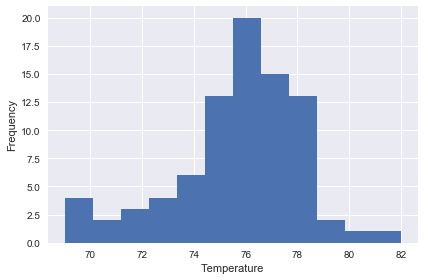

In [22]:
bins = 12
plt.hist(tobs, bins)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.tight_layout()


In [50]:
###Temperature Analysis

def calc_temps():
    start_date = input("Start Date in %y-%m-%d")
    end_date = input("End Date in %y-%m-%d")
    sel = [func.min(Measurement.tobs),
           func.max(Measurement.tobs),
           func.avg(Measurement.tobs)]    
    results = session.query(*sel).\
    filter(Measurement.date > start_date).\
    filter(Measurement.date < end_date).\
    order_by(Measurement.date).all()
    print(results[0])

In [51]:
calc_temps()

Start Date in %y-%m-%d2017-02-16
End Date in %y-%m-%d2017-02-25
(65, 77, 70.64)


In [52]:
calc_temps()

Start Date in %y-%m-%d2016-02-16
End Date in %y-%m-%d2016-02-25
(60, 76, 70.14583333333333)


In [54]:
df = pd.DataFrame(results, columns=['min_temp', 'max_temp', 'avg_temp'])
df

,min_temp,max_temp,avg_temp
0,61,77,70.238095


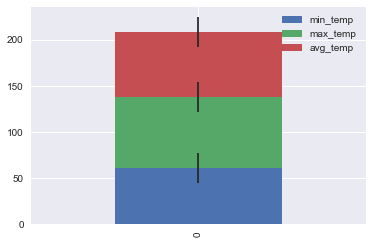

In [63]:
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

df.plot(kind='bar',stacked = True, yerr = df['max_temp']-df['min_temp'])